<a href="https://colab.research.google.com/github/ChaviPalma/Machine_Learning/blob/main/E_Commerce_DB_Ev1_B%C3%A1rbara_Palma_Mena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/Primer semestre 2025/Machine Learning/Ev1 Machine/data.csv'
df = pd.read_csv(url, sep=",", encoding='latin-1')

In [ ]:
#Análisis inicial de datos(muestra los primeros 5 datos del DataSet)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Información general de DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Descripción estadística básica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [ ]:
#Cantidad de valores nulos por columna
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Clasificación de variables

# Variables numéricas (cuantitativas)
numericas_continuas = ['UnitPrice']
numericas_discretas = ['Quantity', 'InvoiceNo', 'StockCode', 'CustomerID']
# Variables categóricas (cualitativas)
categorias_nominales = ['Description', 'Country']
categorias_ordinales = ['InvoiceDate']
# Mostrar la clasificación
print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categorias_nominales)
print("Variables categóricas ordinales:", categorias_ordinales)

for col in categorias_nominales + categorias_ordinales:
    df[col] = df[col].astype('category')


Variables numéricas continuas: ['UnitPrice']
Variables numéricas discretas: ['Quantity', 'InvoiceNo', 'StockCode', 'CustomerID']
Variables categóricas nominales: ['Description', 'Country']
Variables categóricas ordinales: ['InvoiceDate']


## 2. Análisis estadístico descriptivo

### 2.1 Medidas de tendencia central y dispersión para variables numéricas

In [ ]:
# Verificar y tratar valores nulos
print("\nTotal de valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values[null_values > 0])
#Elimina la columna de customerID por que tiene datos nulos
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceWeekday'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
# Calcular total gastado por producto en cada línea de factura
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# Calcular cantidad total de productos por factura
df['ItemsPerInvoice'] = df.groupby('InvoiceNo')['Quantity'].transform('sum')
# Calcular total gastado por factura
df['TotalInvoiceAmount'] = df.groupby('InvoiceNo')['TotalPrice'].transform('sum')
# Verificación final de valores nulos
print("\nVerificación final de valores nulos:")
print(df.isnull().sum().sum())


Total de valores nulos por columna:
Description      1454
CustomerID     135080
dtype: int64

Verificación final de valores nulos:
0


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406829.0,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
InvoiceHour,406829.0,12.737472,6.0,11.0,13.0,14.0,20.0,2.284952
TotalPrice,406829.0,20.401854,-168469.6,4.2,11.1,19.5,168469.6,427.591718
ItemsPerInvoice,406829.0,420.467594,-80995.0,128.0,234.0,426.0,80995.0,889.007533
TotalInvoiceAmount,406829.0,724.046872,-168469.6,242.0,386.05,682.17,168469.6,1501.254138


In [ ]:
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

In [ ]:

# Estadísticas descriptivas completas para columnas numéricas
numerical_vars = ['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']

# Estadísticas descriptivas completas
print("\n--- Estadísticas descriptivas para variables numéricas ---")
stats_df = df[numerical_vars].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
stats_df = stats_df.T  # Transponer para mejor visualización
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variación
stats_df['skew'] = df[numerical_vars].skew()  # Asimetría
stats_df['kurt'] = df[numerical_vars].kurtosis()  # Curtosis
stats_df = stats_df.round(2)  # Redondear para mejor legibilidad
print(stats_df)

# Función para calcular la moda
def get_mode(x):
    mode_result = stats.mode(x)
    if hasattr(mode_result, 'mode'):  # Para scipy < 1.9.0
        return mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:  # Para scipy >= 1.9.0
        return mode_result.mode

# Añadir moda a las estadísticas
print("\n--- Moda para variables numéricas ---")
modes = {col: get_mode(df[col].dropna()) for col in numerical_vars}
for col, mode_val in modes.items():
    print(f"{col}: {mode_val}")

# Análisis de distribución de variables clave
print("\n--- Análisis de distribución y sesgo ---")
for col in numerical_vars:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skew:.2f} - ", end="")
    if skew > 0.5:
        print("Sesgo positivo significativo (cola a la derecha)")
    elif skew < -0.5:
        print("Sesgo negativo significativo (cola a la izquierda)")
    else:
        print("Distribución aproximadamente simétrica")

    print(f"  Curtosis: {kurt:.2f} - ", end="")
    if kurt > 0.5:
        print("Leptocúrtica (más apuntada que la normal)")
    elif kurt < -0.5:
        print("Platicúrtica (más aplanada que la normal)")
    else:
        print("Mesocúrtica (similar a la normal)")
    print()



--- Estadísticas descriptivas para variables numéricas ---
               count       mean       std       min         1%         5%  \
InvoiceNo   397924.0  560617.13  13106.17  536365.0  536856.00  538863.00   
Quantity    406829.0      12.06    248.69  -80995.0      -2.00       1.00   
UnitPrice   406829.0       3.46     69.32       0.0       0.21       0.42   
CustomerID  406829.0   15287.69   1713.60   12346.0   12415.00   12626.00   

                  25%        50%        75%       95%       99%       max  \
InvoiceNo   549234.00  561893.00  572090.00  579493.0  581147.0  581587.0   
Quantity         2.00       5.00      12.00      36.0     120.0   80995.0   
UnitPrice        1.25       1.95       3.75       8.5      15.0   38970.0   
CustomerID   13953.00   15152.00   16791.00   17905.0   18212.0   18287.0   

               cv    skew       kurt  
InvoiceNo    0.02   -0.18      -1.20  
Quantity    20.62    0.18   94317.56  
UnitPrice   20.03  452.22  246924.54  
CustomerID  

### 2.2 Análisis de variables categóricas

In [ ]:
# Variables categóricas nominales
categoricas_nominales = ['Country', 'Description', 'InvoiceDate', 'StockCode']

# Análisis de variables categóricas
print("\n--- Análisis de variables categóricas ---")

# Frecuencias absolutas y relativas para variables categóricas
for col in categoricas_nominales:
    print(f"\nFrecuencias para {col}:")
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True).round(4) * 100
    freq_table = pd.DataFrame({
        'Frecuencia': freq_abs,
        'Porcentaje (%)': freq_rel
    })
    print(freq_table)
    print(f"Moda: {freq_abs.index[0]} (aparece {freq_abs.iloc[0]} veces)")


--- Análisis de variables categóricas ---

Frecuencias para Country:
                      Frecuencia  Porcentaje (%)
Country                                         
United Kingdom            361878           88.95
Germany                     9495            2.33
France                      8491            2.09
EIRE                        7485            1.84
Spain                       2533            0.62
Netherlands                 2371            0.58
Belgium                     2069            0.51
Switzerland                 1877            0.46
Portugal                    1480            0.36
Australia                   1259            0.31
Norway                      1086            0.27
Italy                        803            0.20
Channel Islands              758            0.19
Finland                      695            0.17
Cyprus                       622            0.15
Sweden                       462            0.11
Austria                      401            0.10

## 3. Visualizaciones para el análisis

### 3.1 Distribuciones de variables numéricas clave

In [ ]:
# Lista de variables numéricas
numerical_vars = ['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']

# Variables categóricas nominales
categoricas_nominales = ['Country', 'Description', 'InvoiceDate', 'StockCode']


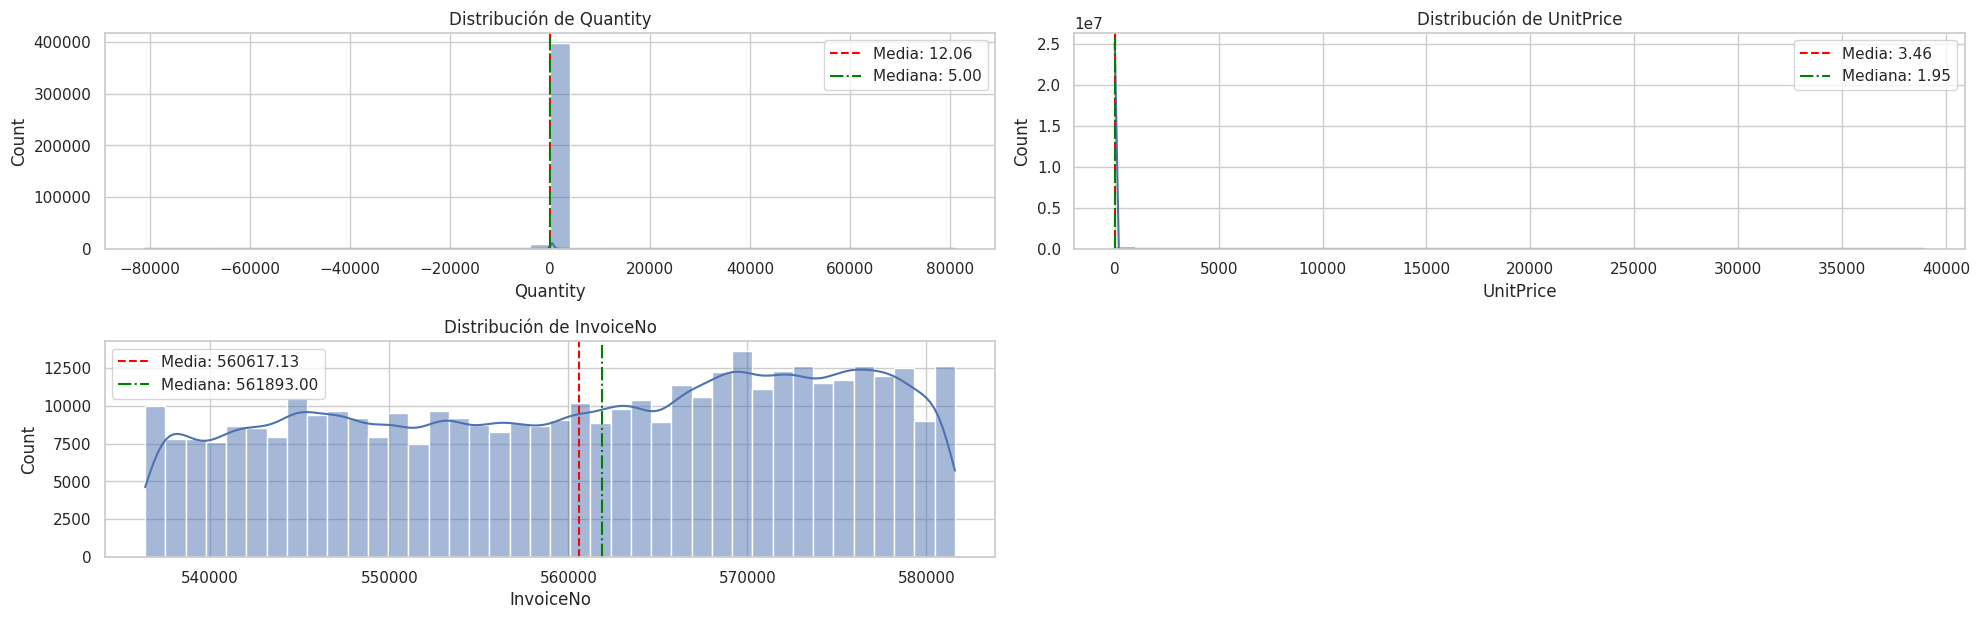

In [ ]:

# Configuración para visualizaciones
plt.figure(figsize=(20, 12))

# Distribución de variables numéricas importantes
key_vars = ['Quantity', 'UnitPrice', 'InvoiceNo']
for i, var in enumerate(key_vars):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[var], kde=True, bins=40)
    plt.title(f'Distribución de {var}')
    plt.axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    plt.axvline(df[var].median(), color='green', linestyle='-.', label=f'Mediana: {df[var].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.savefig('distribuciones_numericas.png')
plt.show()



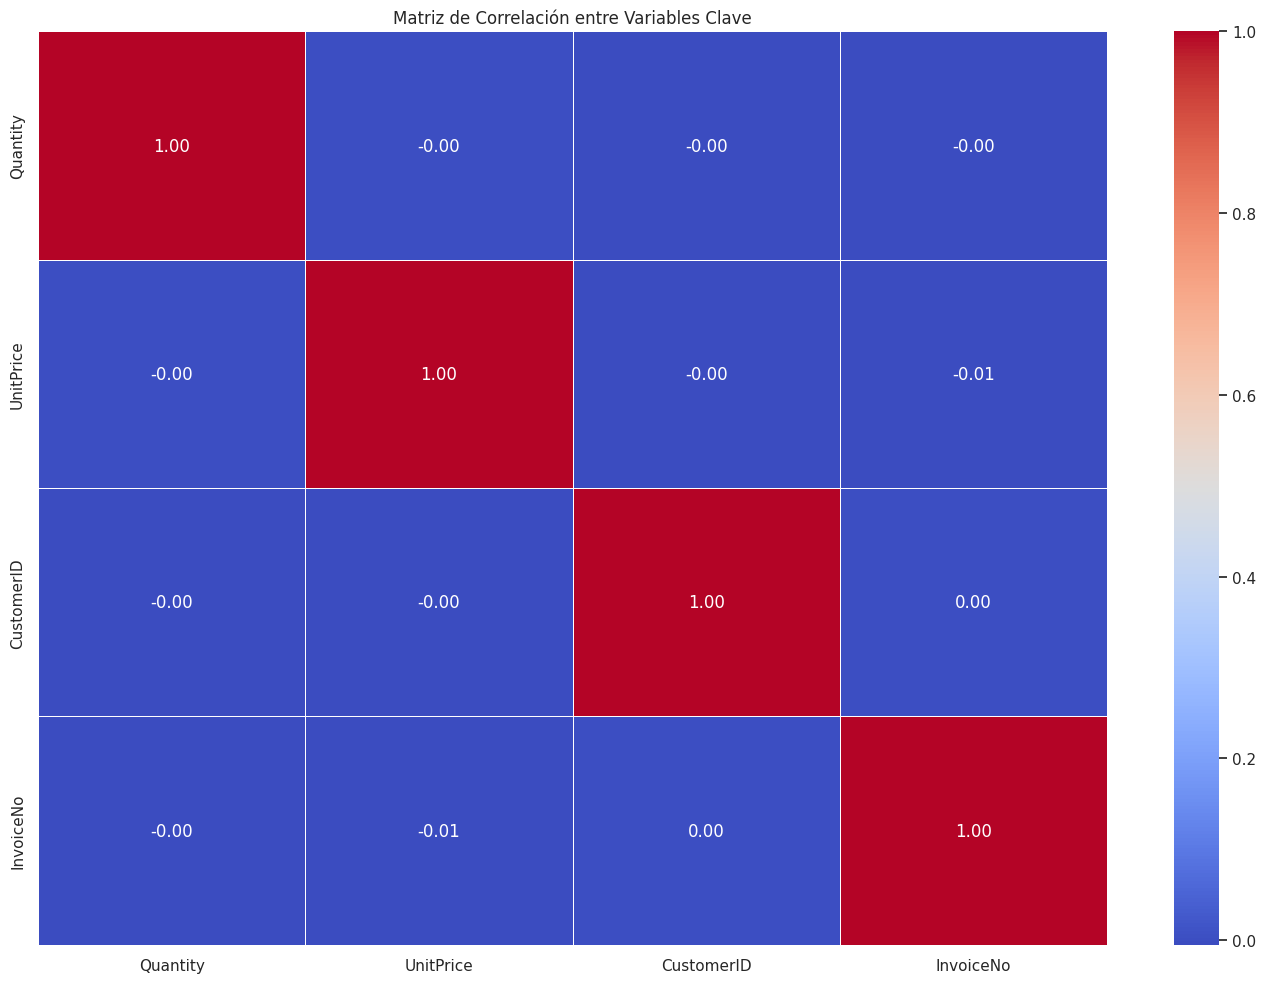

In [ ]:
# Visualización de la matriz de correlación
plt.figure(figsize=(14, 10))
correlation_vars = ['Quantity', 'UnitPrice', 'CustomerID','InvoiceNo']
corr_matrix = df[correlation_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Clave')
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
plt.show()

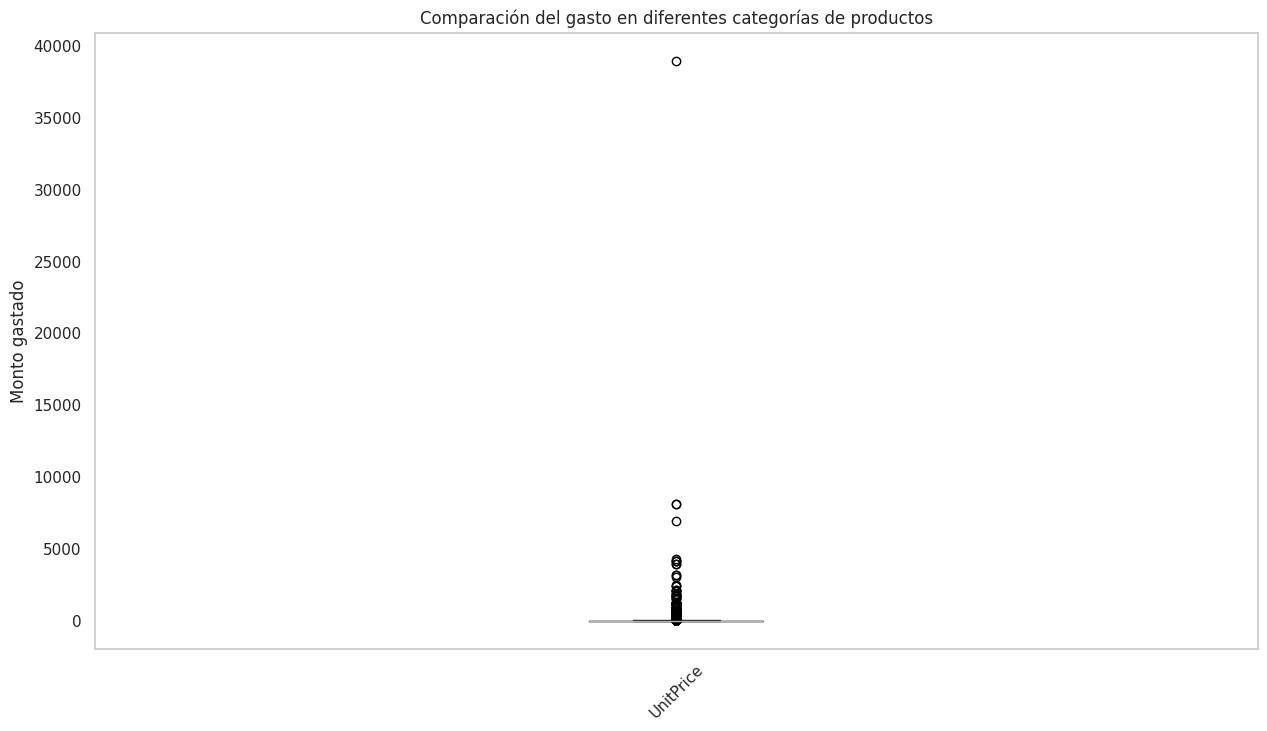

In [ ]:
# Distribución del gasto en diferentes categorías de productos
spending_cols = ['UnitPrice']
plt.figure(figsize=(15, 8))
df[spending_cols].boxplot()
plt.title('Comparación del gasto en diferentes categorías de productos')
plt.ylabel('Monto gastado')
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig('comparacion_gastos.png')
plt.show()


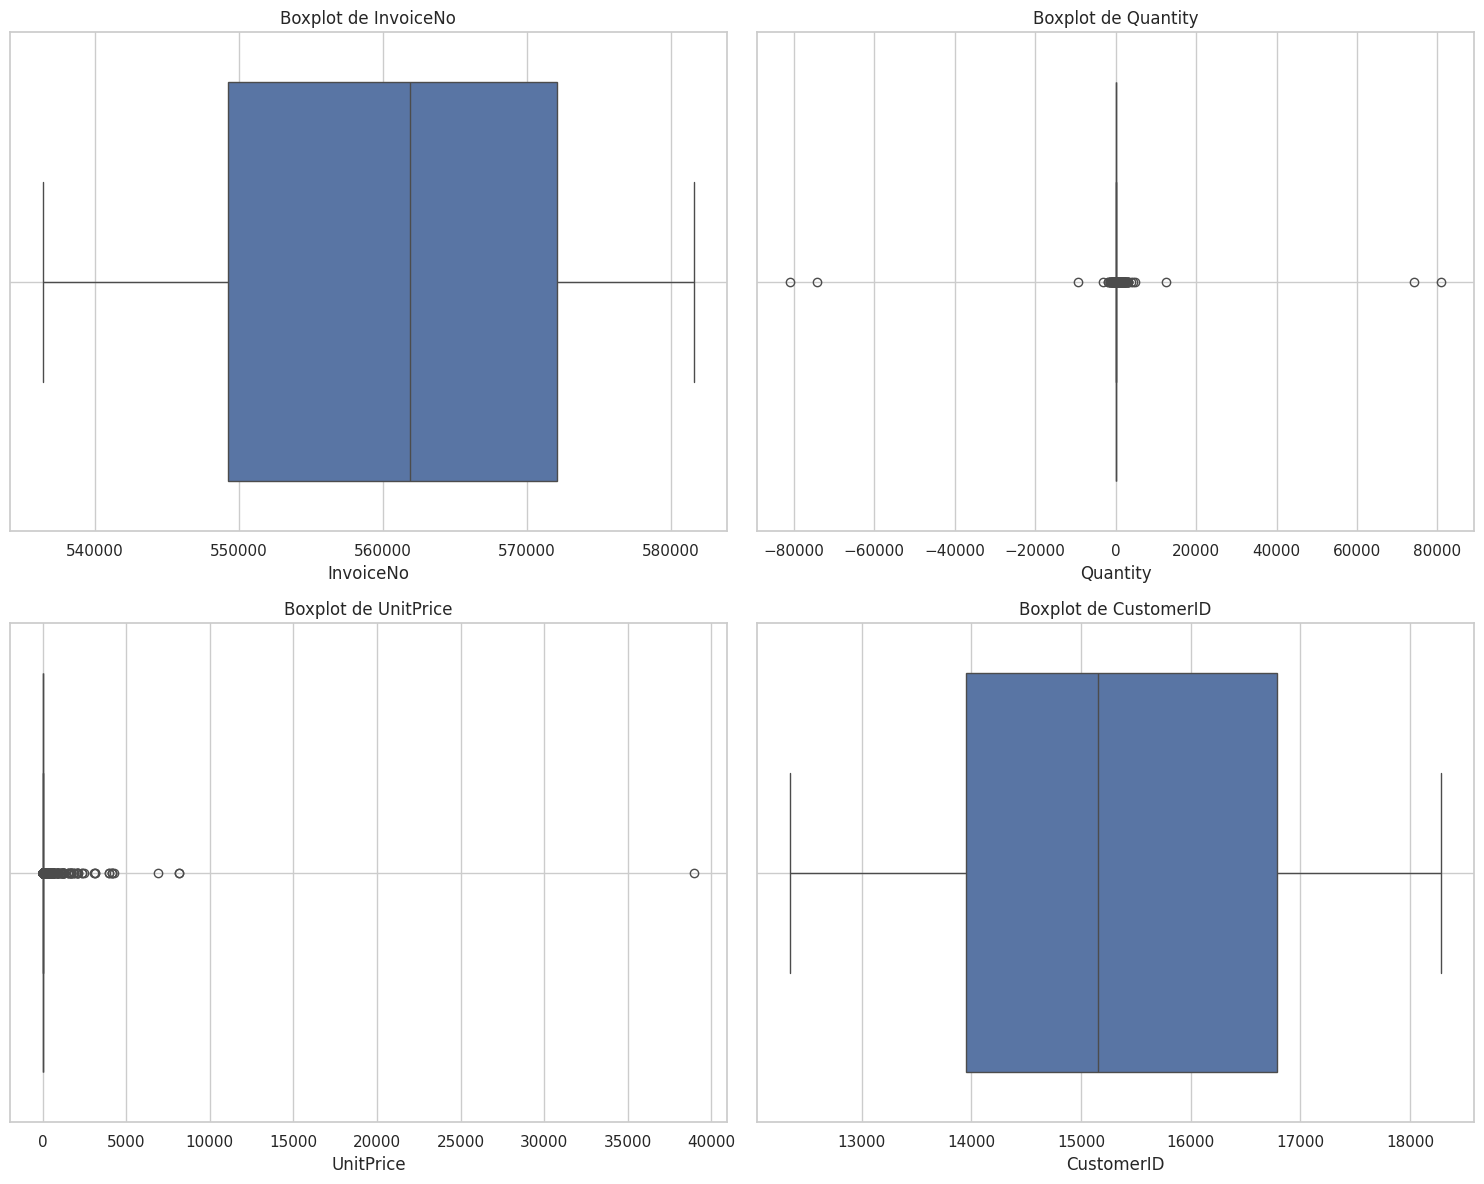

In [ ]:
# Boxplots para detectar outliers en variables numéricas
plt.figure(figsize=(15, 12))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.grid(True)

plt.tight_layout()
plt.savefig('boxplots_outliers.png')
plt.show()

### 3.3 Segmentación por nivel de gasto

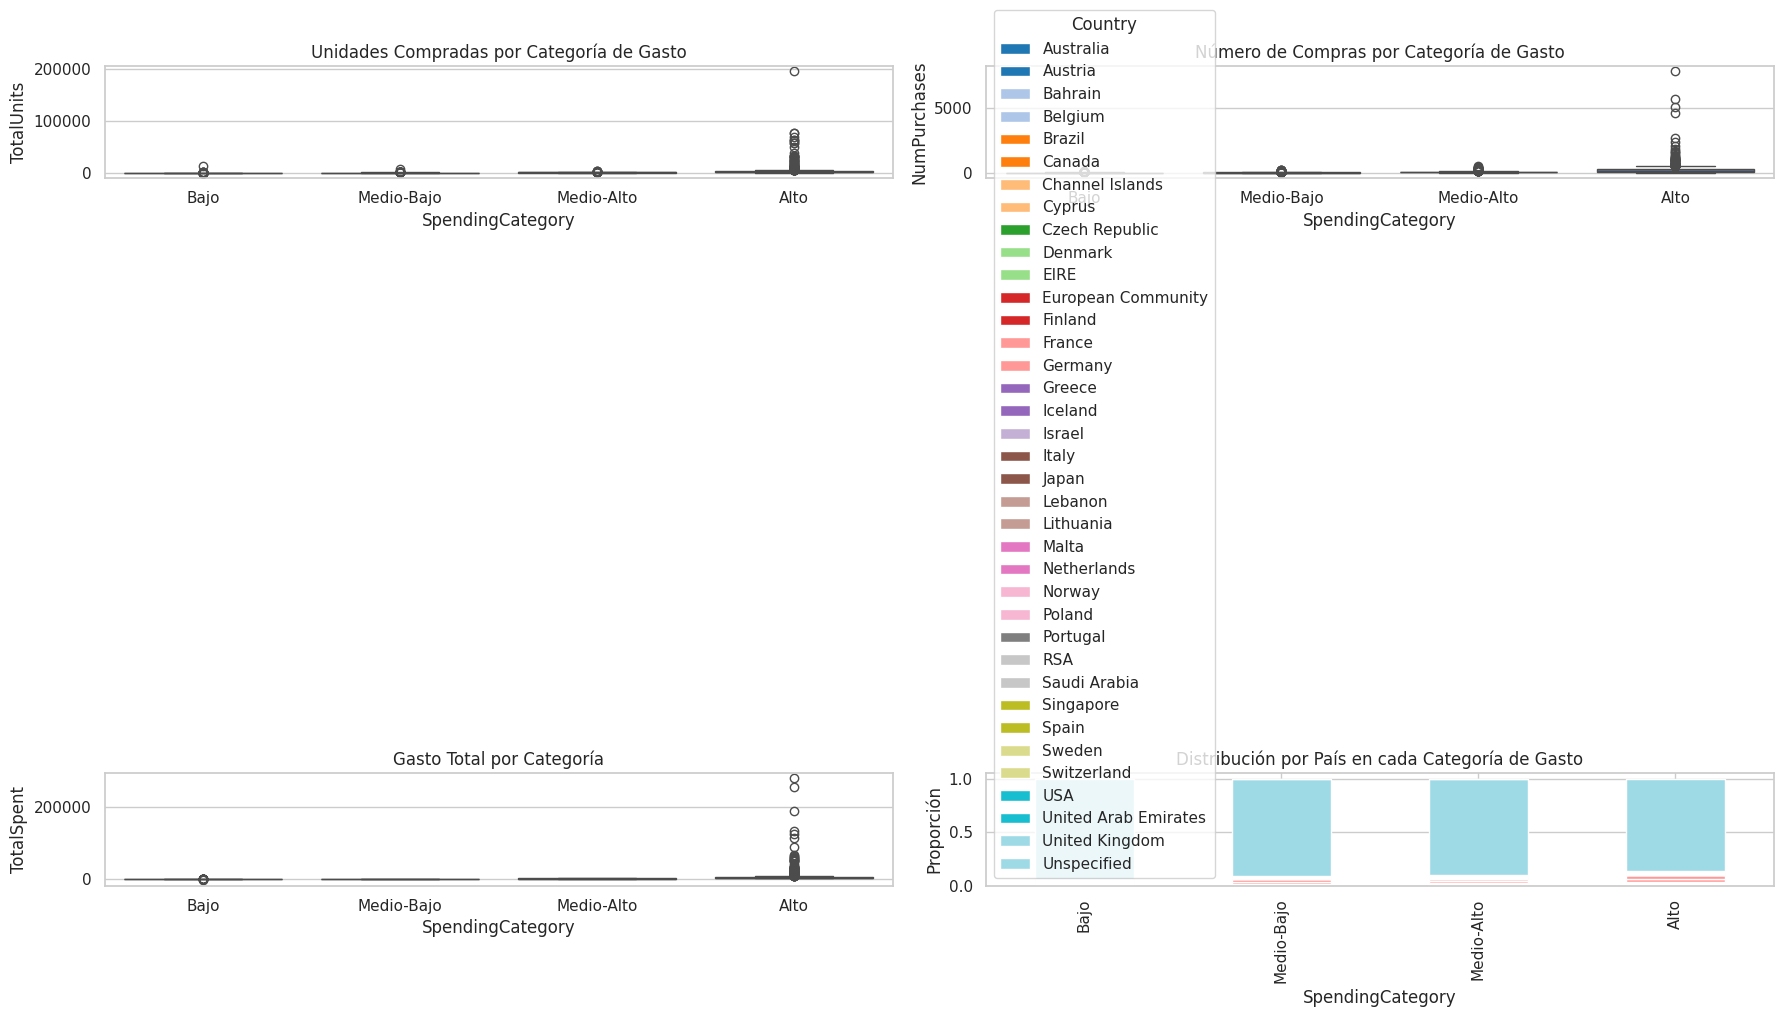

In [ ]:

# Calcular gasto por línea de producto
df["LineTotal"] = df["Quantity"] * df["UnitPrice"]

# Agrupar por cliente
agg_df = df.groupby("CustomerID").agg({
    "LineTotal": "sum",
    "Quantity": "sum",
    "InvoiceNo": "count",
    "Country": "first"
}).rename(columns={
    "LineTotal": "TotalSpent",
    "Quantity": "TotalUnits",
    "InvoiceNo": "NumPurchases"
}).reset_index()

# Crear categorías de gasto
agg_df["SpendingCategory"] = pd.qcut(agg_df["TotalSpent"], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

# Visualizar características por categoría de gasto
plt.figure(figsize=(18, 10))

# Unidades compradas
plt.subplot(2, 2, 1)
sns.boxplot(x='SpendingCategory', y='TotalUnits', data=agg_df)
plt.title('Unidades Compradas por Categoría de Gasto')

# Número de compras (facturas)
plt.subplot(2, 2, 2)
sns.boxplot(x='SpendingCategory', y='NumPurchases', data=agg_df)
plt.title('Número de Compras por Categoría de Gasto')

# Gasto total
plt.subplot(2, 2, 3)
sns.boxplot(x='SpendingCategory', y='TotalSpent', data=agg_df)
plt.title('Gasto Total por Categoría')

# Distribución por país
plt.subplot(2, 2, 4)
crosstab = pd.crosstab(agg_df['SpendingCategory'], agg_df['Country'], normalize='index')
crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Distribución por País en cada Categoría de Gasto')
plt.ylabel('Proporción')

plt.tight_layout()
plt.savefig("segmentacion_completa_adaptada.png")
plt.show()


### 3.4 Análisis de valores atípicos (outliers)


--- Análisis de Valores Atípicos (Outliers) ---

Variable: Quantity
  Límite inferior: -13.00
  Límite superior: 27.00
  Número de outliers: 26682 (6.56% del total)

Variable: UnitPrice
  Límite inferior: -2.50
  Límite superior: 7.50
  Número de outliers: 36051 (8.86% del total)


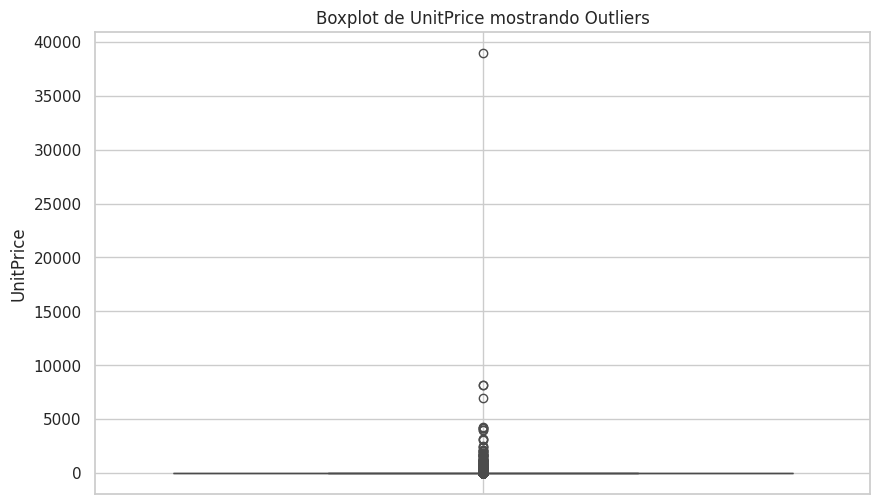

In [ ]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

# Análisis de outliers en las variables numéricas clave
print("\n--- Análisis de Valores Atípicos (Outliers) ---")
outlier_vars = ['Quantity', 'UnitPrice']

for var in outlier_vars:
    outliers, lower, upper, count = identify_outliers(df, var)
    print(f"\nVariable: {var}")
    print(f"  Límite inferior: {lower:.2f}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Número de outliers: {count} ({(count/len(df)*100):.2f}% del total)")

    if count > 0 and count <= 10:
        print("  Valores extremos:")
        print(outliers[var].sort_values(ascending=False).head())

# Visualización: Boxplot para 'UnitPrice'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot de UnitPrice mostrando Outliers')
plt.grid(True)
plt.savefig('outliers_unitprice.png')
plt.show()

## 4. Análisis de correlación y relaciones entre variables

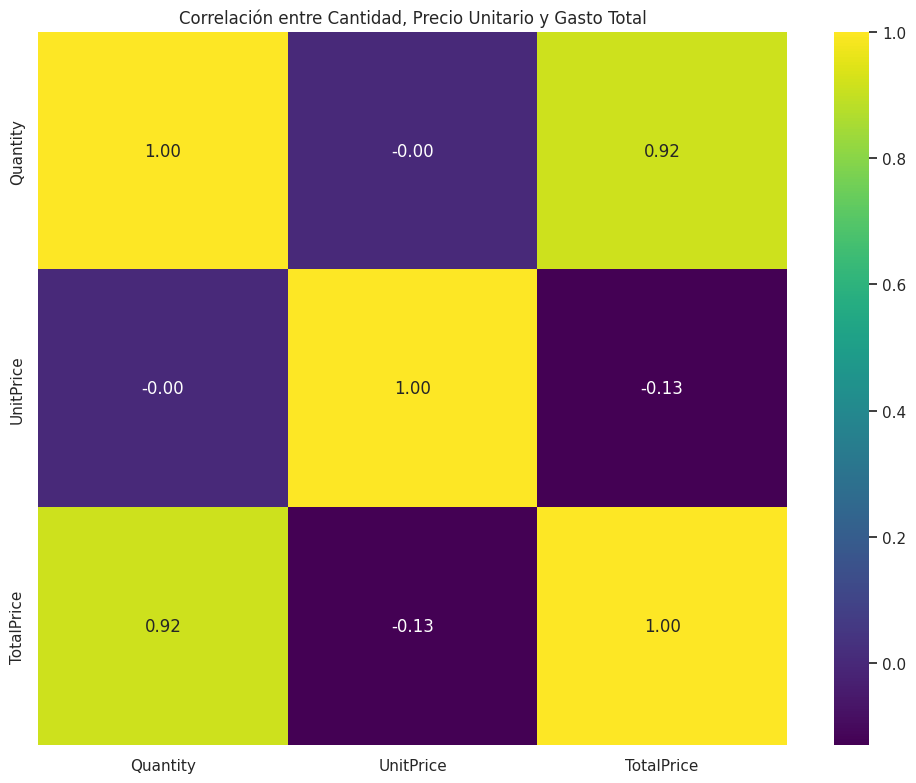

<Figure size 1200x1000 with 0 Axes>

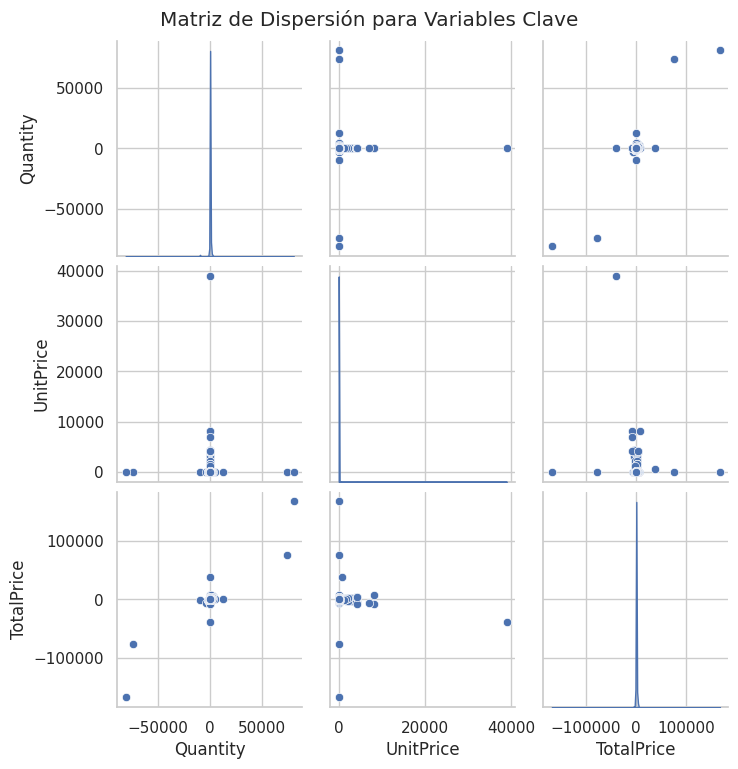

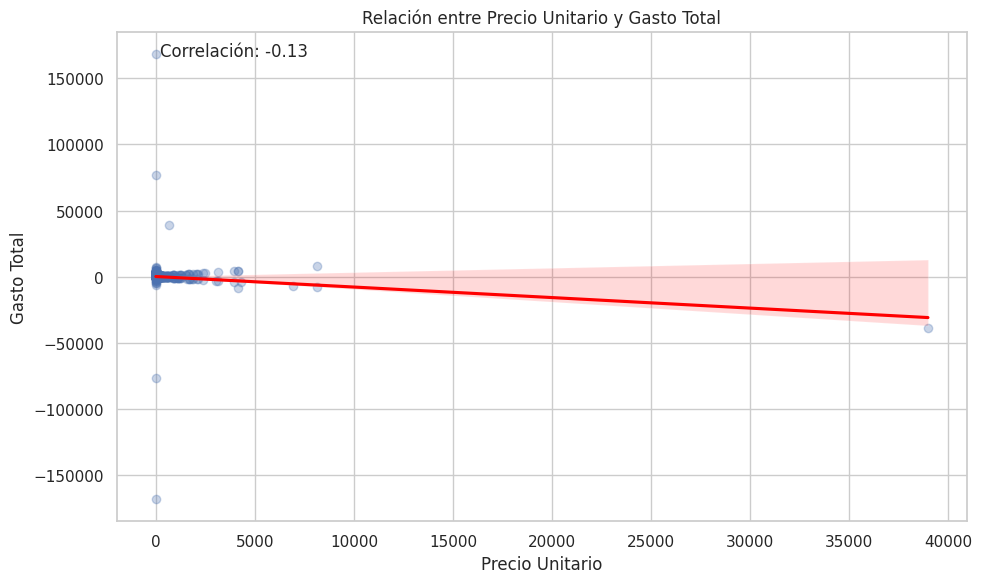

In [ ]:
# --- Correlación entre variables numéricas ---
spending_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

plt.figure(figsize=(10, 8))
sns.heatmap(df[spending_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlación entre Cantidad, Precio Unitario y Gasto Total')
plt.tight_layout()
plt.savefig('correlacion_gastos_ecommerce.png')
plt.show()

# --- Matriz de dispersión ---
plt.figure(figsize=(12, 10))
scatter_vars = ['Quantity', 'UnitPrice', 'TotalPrice']
sns.pairplot(df[scatter_vars], diag_kind='kde')
plt.suptitle('Matriz de Dispersión para Variables Clave', y=1.02)
plt.savefig('matriz_dispersion_ecommerce.png')
plt.show()

# --- Análisis de relación entre precio unitario y gasto total ---
plt.figure(figsize=(10, 6))
sns.regplot(x='UnitPrice', y='TotalPrice', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Precio Unitario y Gasto Total')
plt.xlabel('Precio Unitario')
plt.ylabel('Gasto Total')

# Calcular y mostrar coeficiente de correlación
corr = df['UnitPrice'].corr(df['TotalPrice'])
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.tight_layout()
plt.savefig('relacion_precio_gasto.png')
plt.show()

## 5. Análisis de respuesta a campañas

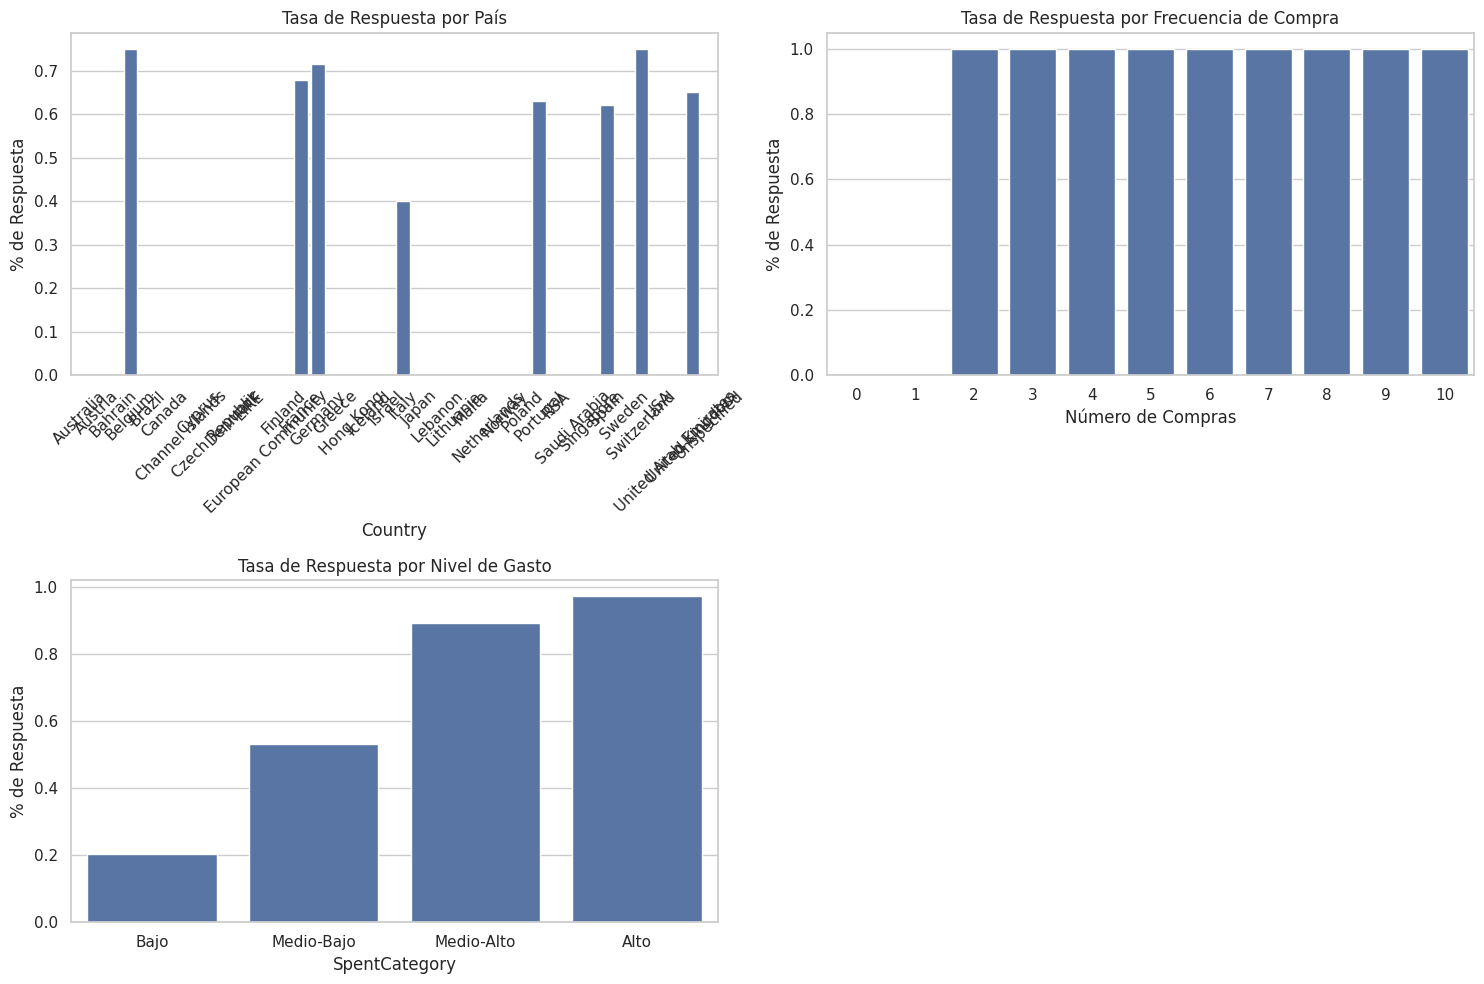

In [ ]:
# Eliminar filas con CustomerID nulo
df = df.dropna(subset=['CustomerID'])
# Agrupar por cliente
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',    # Número de compras
    'TotalPrice': 'sum',
    'Country': 'first'
}).rename(columns={'InvoiceNo': 'PurchaseFrequency', 'TotalPrice': 'TotalSpent'})

# Crear variable "Responder" si ha comprado más de 1 vez
customer_df['ResponderToCampaign'] = customer_df['PurchaseFrequency'].apply(lambda x: 1 if x > 1 else 0)

# Crear categorías de gasto
customer_df['SpentCategory'] = pd.qcut(customer_df['TotalSpent'], q=4,
                                       labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# --- Visualizaciones ---
plt.figure(figsize=(15, 10))

# Respuesta por país (top 8 países)
plt.subplot(2, 2, 1)
top_countries = customer_df['Country'].value_counts().head(8).index
response_by_country = customer_df[customer_df['Country'].isin(top_countries)].groupby('Country')['ResponderToCampaign'].mean()
sns.barplot(x=response_by_country.index, y=response_by_country.values)
plt.title('Tasa de Respuesta por País')
plt.ylabel('% de Respuesta')
plt.xticks(rotation=45)

# Respuesta por frecuencia de compra
plt.subplot(2, 2, 2)
response_by_freq = customer_df.groupby('PurchaseFrequency')['ResponderToCampaign'].mean()
response_by_freq = response_by_freq[response_by_freq.index <= 10]  # Mostrar solo hasta 10 compras
sns.barplot(x=response_by_freq.index.astype(str), y=response_by_freq.values)
plt.title('Tasa de Respuesta por Frecuencia de Compra')
plt.ylabel('% de Respuesta')
plt.xlabel('Número de Compras')

# Respuesta por categoría de gasto
plt.subplot(2, 2, 3)
response_by_spent = customer_df.groupby('SpentCategory')['ResponderToCampaign'].mean()
sns.barplot(x=response_by_spent.index, y=response_by_spent.values)
plt.title('Tasa de Respuesta por Nivel de Gasto')
plt.ylabel('% de Respuesta')

plt.tight_layout()
plt.savefig('analisis_respuesta_clientes_ecommerce.png')
plt.show()


## 6. Conclusiones y hallazgos principales

In [ ]:
print("\n=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===\n")

# 1. Perfil de los clientes
print("1. PERFIL DE LOS CLIENTES:")
print(f"   - Total de clientes únicos: {customer_df.shape[0]}")
print(f"   - País con más clientes: {customer_df['Country'].value_counts().idxmax()} ({customer_df['Country'].value_counts(normalize=True).max()*100:.1f}%)")
print(f"   - Gasto promedio por cliente: ${customer_df['TotalSpent'].mean():.2f}")
print(f"   - Frecuencia promedio de compra: {customer_df['PurchaseFrequency'].mean():.2f} compras")

# 2. Patrones de gasto
print("\n2. PATRONES DE GASTO:")
print(f"   - Gasto total en la tienda: ${customer_df['TotalSpent'].sum():,.2f}")
print("   - Distribución del gasto por cliente:")
spent_summary = customer_df['SpentCategory'].value_counts(normalize=True).sort_index()
for level, pct in spent_summary.items():
    print(f"     * {level}: {pct*100:.1f}% de los clientes")

# 3. Comportamiento de compra
print("\n3. COMPORTAMIENTO DE COMPRA:")
print(f"   - Máxima frecuencia de compra registrada: {customer_df['PurchaseFrequency'].max()}")
top_buyers = customer_df.sort_values(by='PurchaseFrequency', ascending=False).head(3)
print("   - Principales compradores (mayor número de compras):")
for cid, row in top_buyers.iterrows():
    print(f"     * Cliente {int(cid)}: {int(row['PurchaseFrequency'])} compras - ${row['TotalSpent']:.2f} gastado")

# 4. Respuesta simulada a campañas (clientes recurrentes)
print("\n4. RESPUESTA SIMULADA A CAMPAÑAS:")
response_rate = customer_df['ResponderToCampaign'].mean()
print(f"   - Tasa de respuesta simulada (más de una compra): {response_rate*100:.1f}%")
print(f"   - Segmento con mayor tasa de respuesta: {customer_df.groupby('SpentCategory')['ResponderToCampaign'].mean().idxmax()}")

# 5. Distribución y outliers
print("\n5. DISTRIBUCIÓN Y OUTLIERS:")
for var in ['TotalSpent', 'PurchaseFrequency']:
    skew = customer_df[var].skew()
    desc = "simétrica" if abs(skew) < 0.5 else "sesgada a la derecha" if skew > 0 else "sesgada a la izquierda"
    print(f"   - {var}: Distribución {desc} (skew = {skew:.2f})")
    print(f"     Media: {customer_df[var].mean():.2f}, Mediana: {customer_df[var].median():.2f}")

# 6. Recomendaciones para campañas
print("\n6. RECOMENDACIONES PARA CAMPAÑAS FUTURAS:")
print("   - Focalizar esfuerzos en clientes del segmento 'Alto', quienes tienen mayor probabilidad de repetir compras.")
print("   - Incentivar países con alta presencia de compradores frecuentes.")
print("   - Ofrecer beneficios por recurrencia para aumentar la tasa de retención de compradores de un solo pedido.")



=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===

1. PERFIL DE LOS CLIENTES:
   - Total de clientes únicos: 4372
   - País con más clientes: United Kingdom (90.3%)
   - Gasto promedio por cliente: $1898.46
   - Frecuencia promedio de compra: 4.24 compras

2. PATRONES DE GASTO:
   - Gasto total en la tienda: $8,300,065.81
   - Distribución del gasto por cliente:
     * Bajo: 25.0% de los clientes
     * Medio-Bajo: 25.0% de los clientes
     * Medio-Alto: 25.0% de los clientes
     * Alto: 25.0% de los clientes

3. COMPORTAMIENTO DE COMPRA:
   - Máxima frecuencia de compra registrada: 210
   - Principales compradores (mayor número de compras):
     * Cliente 12748: 210 compras - $29072.10 gastado
     * Cliente 14911: 201 compras - $132572.62 gastado
     * Cliente 17841: 124 compras - $40340.78 gastado

4. RESPUESTA SIMULADA A CAMPAÑAS:
   - Tasa de respuesta simulada (más de una compra): 65.1%
   - Segmento con mayor tasa de respuesta: Alto

5. DISTRIBUCIÓN Y OUTLIERS:
   - TotalSpent: D